# Introduction
In this assignment a tubelight is simulated. Whenever a tubelight is used the electrons move from the cathode with zero energy at the cathode to the anode.The electric field in between accelerates the electrons and thus energizes it.Therefore if some electron crosses a threshold energy, then it can excite the atom which it hits and thus it can emit light. But there is some probability with which the electron hits an atom.

## Assumptions in the simulation:
1:The electron comes to rest (i.e. it loses all of it's energy) after collision and is made to accelerate again starting with zero velocity.<br/>
2:The electron acceleration due to the electron field is equal to 1$m/s^2$.<br/>
3:The time between each update of displacement,velocity and acceleration is 1 sec.<br/>
4:Five new electrons with standard deviation of 2 are added into the tubelight after every turn of the simulation.<br/>



# Import Libraries

In [1]:
from pylab import *
import sys


# Take input from user or use a set of predefined parameters

In [2]:
if len(sys.argv)==6:
    n=sys.argv[0]  # spatial grid size.
    M=sys.argv[1]    # number of electrons injected per turn.
    nk=sys.argv[2] # number of turns to simulate.
    u0=sys.argv[3]  # threshold velocity.
    p=sys.argv[4] # probability that ionization will occur
    Msig=sys.argv[5] #deviation of elctrons injected per turn
    params=[n,M,nk,u0,p,Msig]
else:
    params=[[100,5,500,5,0.25,2],[100,5,500,5,0.50,2],
        [100,5,500,5,1,2],[100,5,500,10,0.25,2],
        [100,5,500,10,0.50,2],[100,5,500,10,1,2]]

# The loop of the simulation
Here a function is defined which runs through the main loop of the simulation.<br/>
Here the algorithm used is as defined in the problem.<br/>
* Note: The algorithm is explained in the comments

In [3]:
def loop(params,quadratic):
    n=params[0]
    M=params[1]
    nk=params[2]
    u0=params[3]
    p=params[4]
    Msig=params[5]
    xx=np.zeros((n*M))  # electron position
    u=np.zeros((n*M))   #electron velocity
    dx=np.zeros((n*M))  #displacement in current turn

    I=[]
    V=[]
    X=[]
    
    for i in range(1,nk):
        ii=where(xx>0) #get the indices of positions greater than zero
        dx[ii]=u[ii]+0.5 #increase the displacement
        xx[ii]+=dx[ii] #increase the position
        u[ii]+=1 #increase the velocity
        reached=where(xx[ii]>n)#contains the indices 
        #set position,velocities,displacements to zero
        xx[ii[0][reached]]=u[ii[0][reached]]=dx[ii[0][reached]]=0
        kk=where(u>=u0)
        ll=where(rand(len(kk[0]))<=p)
        kl=kk[0][ll]#contains the indices 
        #of energetic electrons that suffer collision
        u[kl]=0 # reset the velocity after collision
        if quadratic==False:
            rho=rand(len(kl)) #get random number 
        if quadratic==True:    
            rho=power(0.5,len(kl)) # a quadratic probability distribution
        xx[kl]=xx[kl]-dx[kl]*rho #get the actual value of x where it collides
        I.extend(xx[kl].tolist())
        m=int(rand()*Msig+M) #get the (random)number of new electrons to be added
        empty=where(xx==0) #get empty spaces where electrons can be injected
        nv=(min(n*M-len(empty),m)) #if no empty spaces are left
        xx[empty[:nv]]=1 #inject the new electrons
        u[empty[0][:nv]]=0 #with velocity zero
        dx[empty[0][:nv]]=0 #and displacement zero
        X.extend(xx.tolist())
        V.extend(u.tolist())

    
    
    return X,V,I

# The functions to plot the graphs

`plot_no_of_elec` plots the number of electrons vs x.<br/>
`plot_intensity` plots the intensity vs x.<br/>
`plot_intensity_map` plots the relative brightness of the tubelight in grayscale.<br/>
`plot_phase` plots the phase space of the electrons.<br/>

In [6]:
def plot_no_of_elec(X,u0,p):
#plot the number of electrons vs x
    figure(1)
    hist(X,bins=np.arange(0,101,0.5),rwidth=0.8,color='g')
    title('Number of Electrons vs $x$ with $u_0=$%f and p=%f'%(u0,p))
    xlabel('$x$')
    ylabel('Number of electrons')
    show()

def plot_intensity_map(I,u0,p):
#plot the intensity map
    histogram_=hist(I,bins=np.arange(0,101,1),rwidth=0.8,color='r')
    x=histogram_[1][1:]
    y=histogram_[0]
    fig, (ax) = plt.subplots(nrows=1, sharex=True)
    extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
    intensity=ax.imshow(y[np.newaxis,:], cmap="gray", aspect="auto", extent=extent)
    ax.set_yticks([])
    ax.set_xlim(extent[0], extent[1])
    plt.title('Intensity map with $u_0=$%f and p=%f'%(u0,p))
    plt.xlabel('$x$')
    plt.colorbar(intensity)
    plt.tight_layout()
    show()
    
def plot_intensity(X,V,u0,p):
    #plot the histogram of intensity
    figure(0)
    histogram=hist(I,bins=np.arange(0,101,0.5),rwidth=0.8,color='r')
    title('Intensity histogram with $u_0=$%f and p=%f'%(u0,p))
    xlabel('$x$')
    ylabel('Intensity')
    show()
    return histogram

def plot_phase(X,V,u0,p):
#plot the phase space
    figure(2)
    plt.plot(X,V,'bo')
    title('Electron Phase Space with $u_0=$%f and p=%f'%(u0,p))
    xlabel('$x$')
    ylabel('Velocity-$v$')
    show()
    
def plot_phase_2D(X,V,I,u0,p):
#plot the phase space
    figure(2)
    plt.plot(X,V,'bo')
    title('Electron Phase Space with $u_0=$%f and p=%f'%(u0,p))
    xlabel('$x$')
    ylabel('Velocity-$v$')
    show()    

# Plot of the graphs with uniform probability of electron.
In the intensity vs x graph the intensity reaches a maximum at around x=15 and stays like that for around 4-5 bins and then it decreases.This is because of the fact that the electron comes to rest after collision.So it has to gain energy again from zero to be able to excite the atom for emitting light.<br/>
In the electron phase space the graph shows the allowed velocities at a particular value of x thus we can say that the velocities are quantized.<br/>
The number of electrons vs x graph shows the number of electrons which got excited at that value of x.<br/>

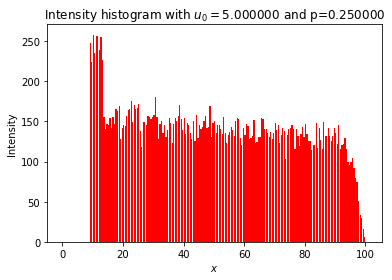

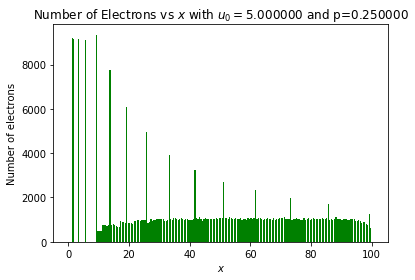

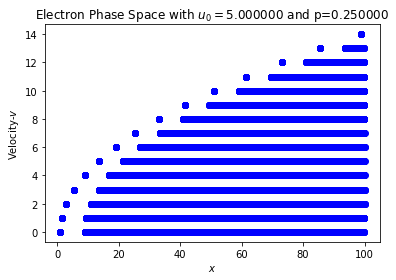

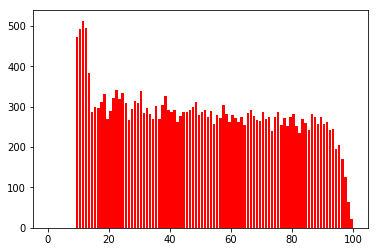

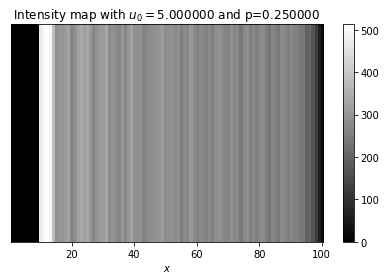

In [7]:
param=[100,5,500,5,0.25,2]
X,V,I=loop(param,False)
histo=plot_intensity(X,V,param[3],param[4])
plot_no_of_elec(X,param[3],param[4])
plot_phase(X,V,param[3],param[4])
plot_intensity_map(I,param[3],param[4])

# Table of Population vs xpos

In [49]:
import pandas as pd
df=pd.DataFrame([histo[1][:-1],histo[0][:]])
df=df.transpose()
df.columns = ['xpos', 'Population']
df[::2]

,xpos,Population
0,0.0,0.0
2,1.0,0.0
4,2.0,0.0
6,3.0,0.0
8,4.0,0.0
10,5.0,0.0
12,6.0,0.0
14,7.0,0.0
16,8.0,0.0
18,9.0,248.0


In [31]:
histo[0][:].shape,histo[1][:-1].shape

((201,), (201,))

# Plot of the graphs with quadratic probability of electron.
In the intensity vs x graph the intensity increases and then suddenly drops.This is different than the previous model as the electron getting excited is more towards the right side as it's velocity increases.<br/>

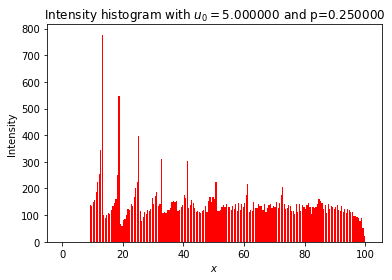

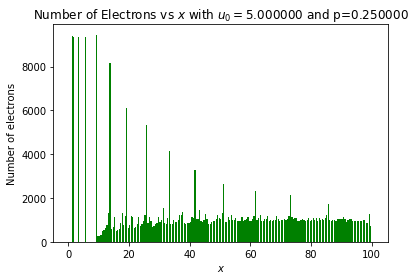

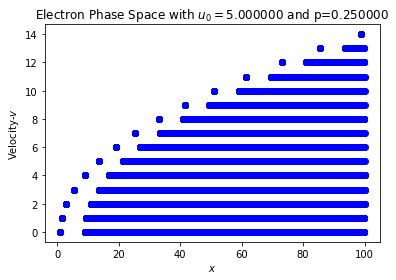

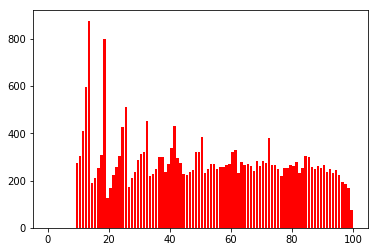

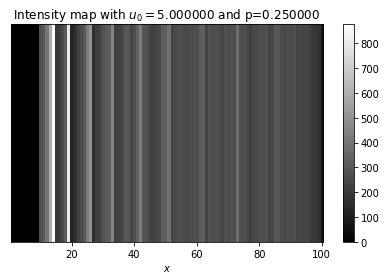

In [15]:
param=[100,5,500,5,0.25,2]
X,V,I=loop(param,True)
plot_intensity(X,V,param[3],param[4])
plot_no_of_elec(X,param[3],param[4])
plot_phase(X,V,param[3],param[4])
plot_intensity_map(I,param[3],param[4])

# Iterating through the different parameters
The variation in the graphs when the cutoff velocity and probability are captured here.
One specific observation is that as the probability increases the graphs become more variate i.e. the superposition of the probability graphs become more seperated.Also the maximum intensity also increases as the electrons get inonized more often. <br/>
Also as the cutoff velocity (i.e. the gas inside the tubelight is changed) is increased they initial excitation happens at a higher value of x.This is because the elctron has to travel longer distances to be able to reach cutoff frequency.<br/>


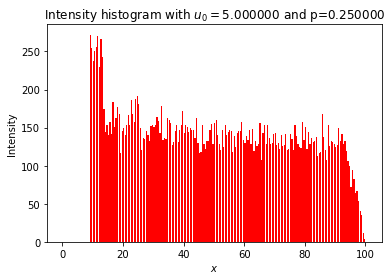

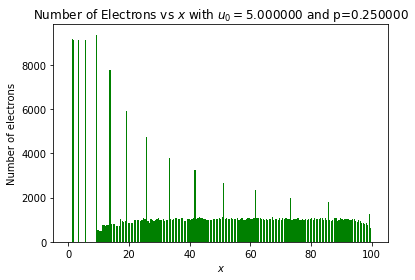

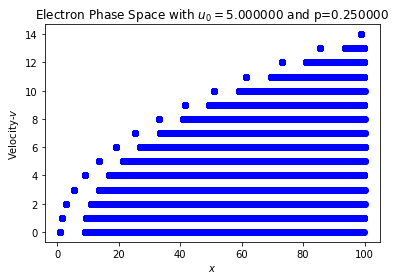

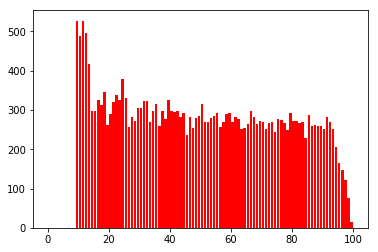

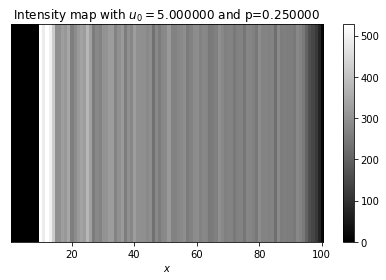

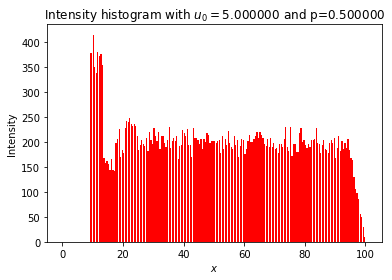

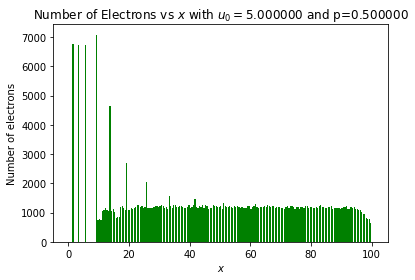

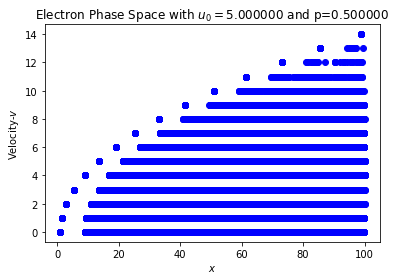

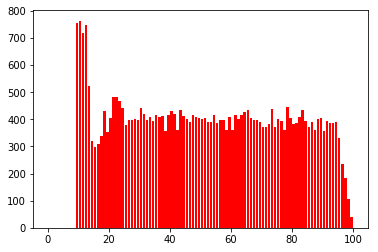

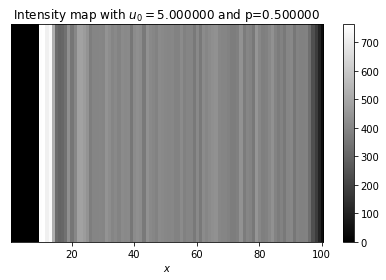

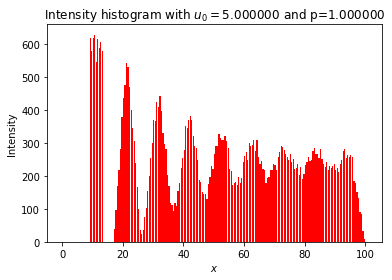

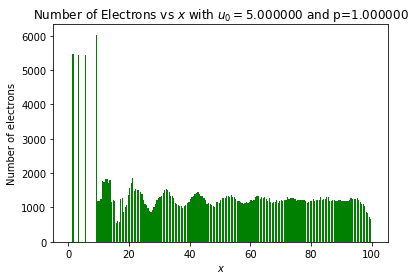

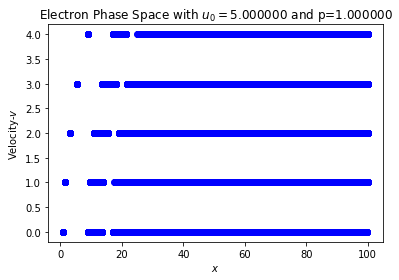

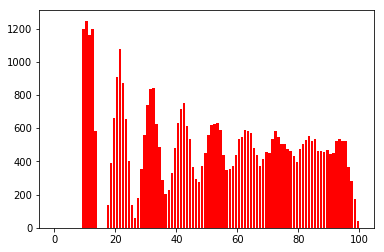

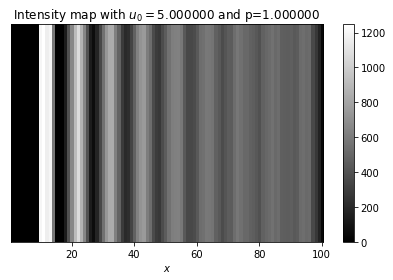

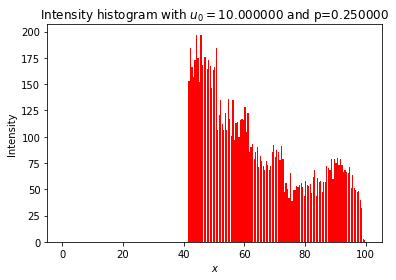

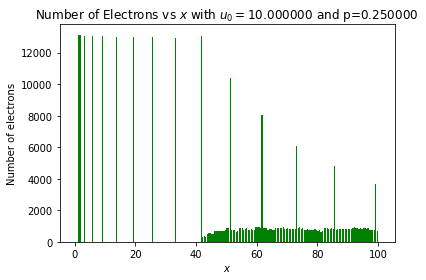

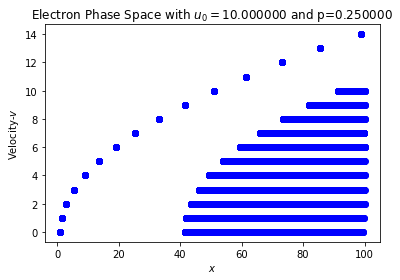

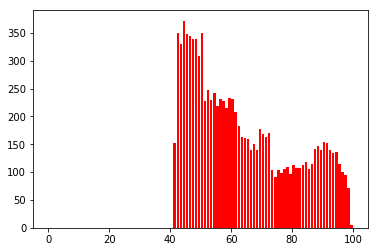

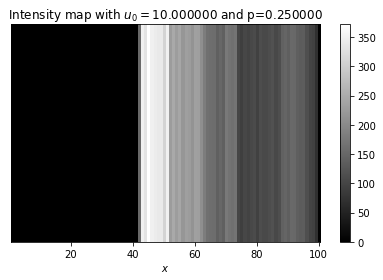

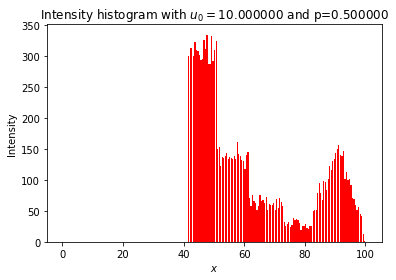

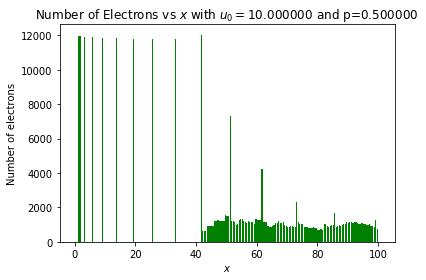

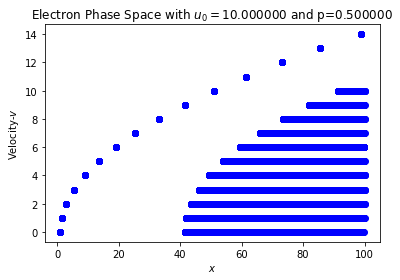

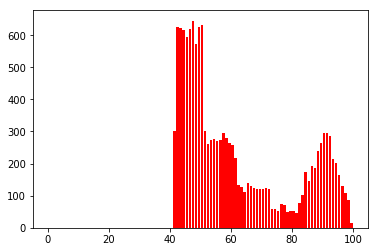

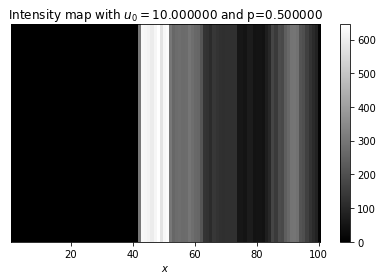

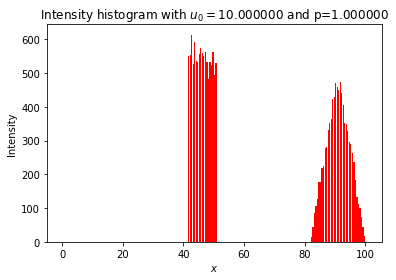

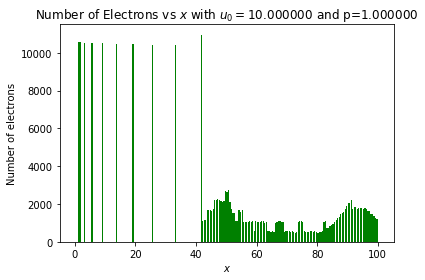

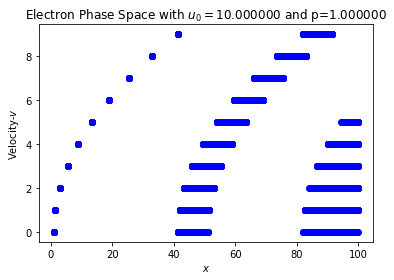

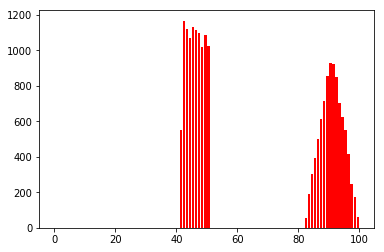

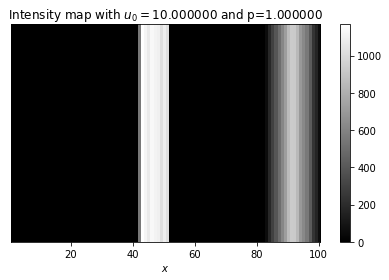

In [50]:
for param in params:
    X,V,I=loop(param,False)
    plot_intensity(X,V,param[3],param[4])
    plot_no_of_elec(X,param[3],param[4])
    plot_phase(X,V,param[3],param[4])
    plot_intensity_map(I,param[3],param[4])